In [3]:
ls

1_1: Distribution of Inter-Arrival Times.png
1_1: Distribution of Request Lengths.png
1_2: Distribution of Inter-Arrival Times.png
1_2: Distribution of Request Lengths.png
client*
client-output.txt
q1.txt
q2.txt
q3_a10.txt
q3_a10_1.txt
q3_a11.txt
q3_a11_1.txt
q3_a12.txt
q3_a12_1.txt
q3_a13.txt
q3_a13_1.txt
q3_a14.txt
q3_a14_1.txt
q3_a15.txt
q3_a15_1.txt
q3_a16.txt
q3_a16_1.txt
q3_a17.txt
q3_a17_1.txt
q3_a18.txt
q3_a18_1.txt
q3_a19.txt
q3_a19_1.txt
q4.txt
q5.txt
server-output.txt
server_lim*
server_lim.o
timelib.o


In [132]:
import numpy as np, pandas as pd
import re
import matplotlib.pyplot as plt

In [133]:
 ########### 1(a) IAT vs req_len with d = 2  ###########

In [134]:
df_1a = pd.read_fwf('q1.txt', header=None)
df_1a.rename(columns={df_1a.columns[0]: 'req_opt'}, inplace=True)

In [135]:
def remove_rows(row):
    return not row['req_opt'].startswith('Q')
df_1a_noqueues = df_1a[df_1a.apply(remove_rows, axis=1)] 

In [136]:
df_1a_noqueues.reset_index(drop=True, inplace=True)
df_1a_noqueues

,req_opt
0,"R0:3314.708013,0.200000,3314.710497,3314.71094..."
1,"R1:3315.115651,0.200000,3315.115701,3315.11581..."
2,"R2:3315.227144,0.200000,3315.227179,3315.31598..."
3,"R3:3315.566827,0.200000,3315.566936,3315.56698..."
4,"R4:3315.922813,0.200000,3315.922868,3315.92289..."
...,...
1495,"R1495:3642.405476,0.200000,3642.405524,3642.65..."
1496,"R1496:3642.716202,0.200000,3642.716249,3642.85..."
1497,"R1497:3642.899207,0.200000,3642.899238,3643.05..."
1498,"R1498:3642.923254,0.200000,3642.923287,3643.25..."


In [137]:
for i in range(len(df_1a_noqueues['req_opt'])):
    df_1a_noqueues['req_opt'][i] = re.sub(r"^(.*):", '', df_1a_noqueues['req_opt'][i])
    df_1a_noqueues['req_opt'][i] = re.split(r",", df_1a_noqueues['req_opt'][i])
    df_1a_noqueues['req_opt'][i][:] = map(lambda x: float(x), df_1a_noqueues['req_opt'][i])

/var/folders/vr/syshz9v92js62ld8ch0rw37r0000gn/T/ipykernel_3770/4107280742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1a_noqueues['req_opt'][i] = re.sub(r"^(.*):", '', df_1a_noqueues['req_opt'][i])
/var/folders/vr/syshz9v92js62ld8ch0rw37r0000gn/T/ipykernel_3770/4107280742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1a_noqueues['req_opt'][i] = re.split(r",", df_1a_noqueues['req_opt'][i])


In [138]:
df_1a_noqueues['req_opt'][0]

[3314.708013, 0.2, 3314.710497, 3314.710945, 3314.910989]

In [139]:
tailored_df_1a = pd.DataFrame(columns=['sent_time', 'req_len', 'receipt_time', 'start_time', 'completion_time'])
for i in range(0, len(df_1a_noqueues)):
    row = df_1a_noqueues.iloc[i]
    new_row = {'sent_time': row[0][0],\
               'req_len': row[0][1],\
               'receipt_time': row[0][2],\
               'start_time': row[0][3],\
               'completion_time': row[0][4]
              }
    tailored_df_1a.loc[len(tailored_df_1a)] = new_row
    
print(tailored_df_1a)

        sent_time  req_len  receipt_time   start_time  completion_time
0     3314.708013      0.2   3314.710497  3314.710945      3314.910989
1     3315.115651      0.2   3315.115701  3315.115813      3315.315818
2     3315.227144      0.2   3315.227179  3315.315983      3315.515985
3     3315.566827      0.2   3315.566936  3315.566985      3315.766989
4     3315.922813      0.2   3315.922868  3315.922893      3316.122895
...           ...      ...           ...          ...              ...
1495  3642.405476      0.2   3642.405524  3642.653576      3642.853500
1496  3642.716202      0.2   3642.716249  3642.853609      3643.053600
1497  3642.899207      0.2   3642.899238  3643.053656      3643.253600
1498  3642.923254      0.2   3642.923287  3643.253688      3643.453600
1499  3642.957636      0.2   3642.957669  3643.453733      3643.653700

[1500 rows x 5 columns]


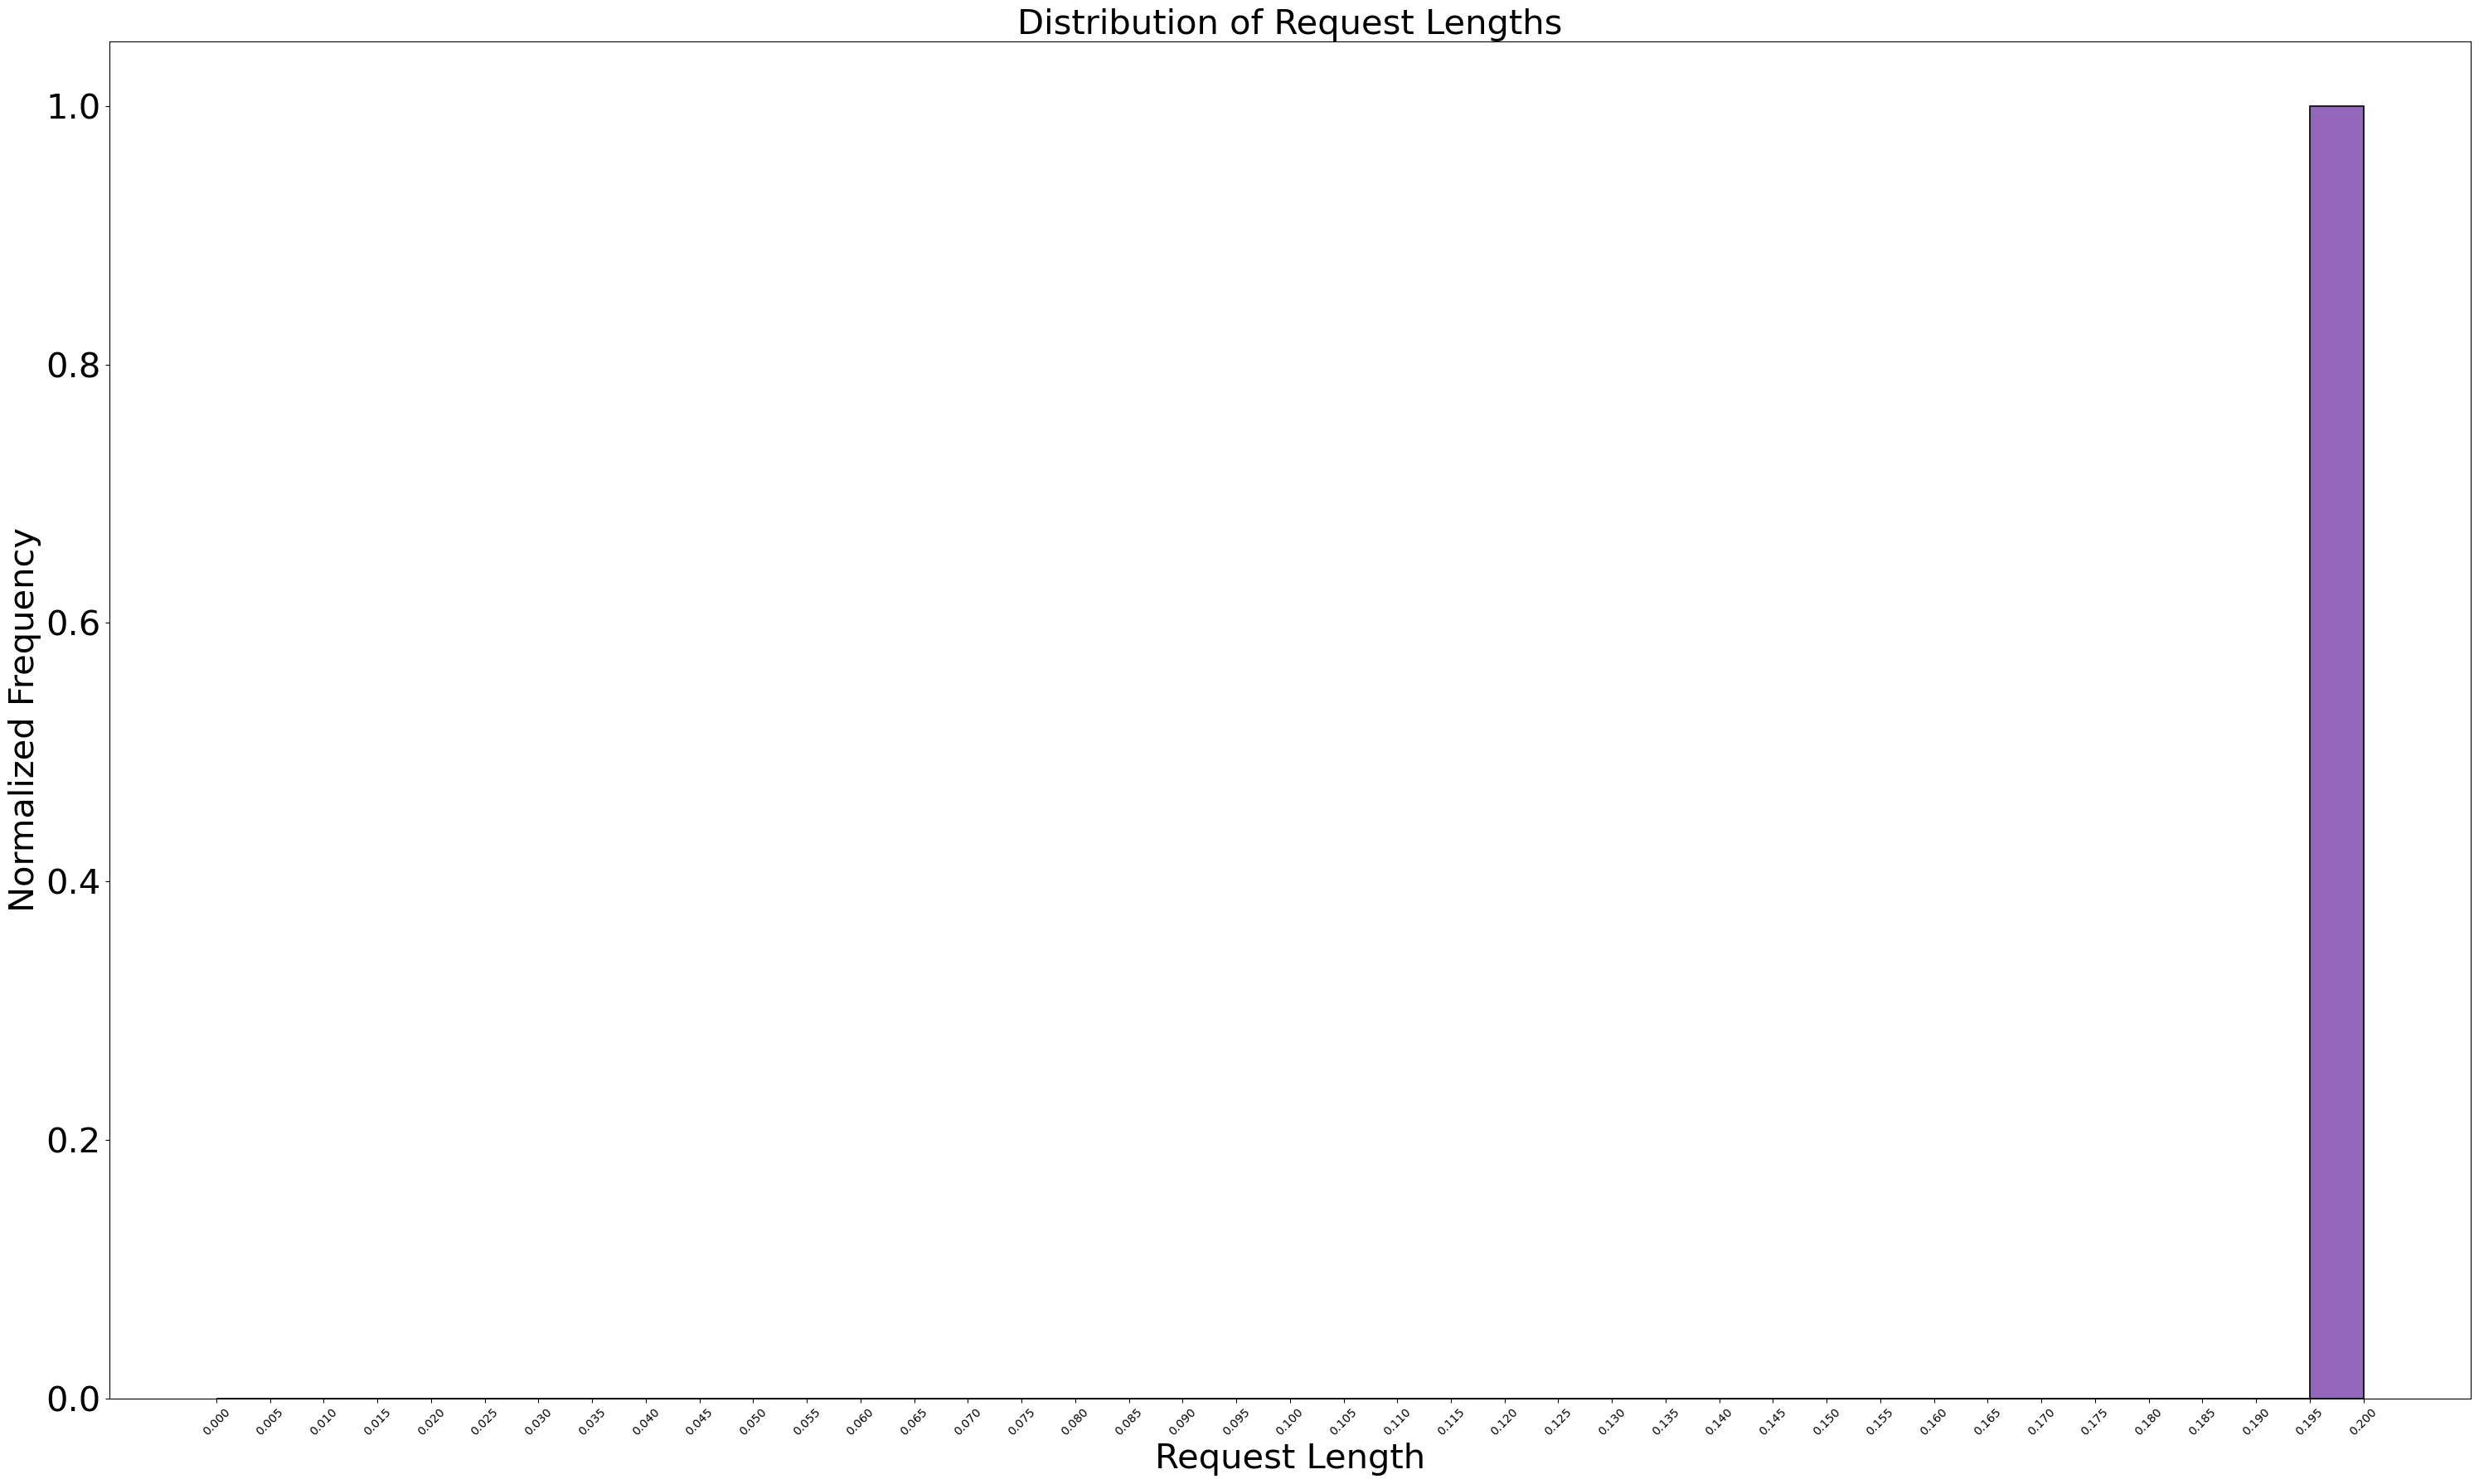

In [140]:
bins_partitioned = np.arange(0, max(tailored_df_1a['req_len'])+0.005, 0.005)
hist, _ = np.histogram(tailored_df_1a['req_len'], bins=bins_partitioned)
normalized_hist = hist / sum(hist)
plt.figure(figsize=(30, 18))
plt.bar(bins_partitioned[:-1], normalized_hist, width=0.005, align='edge', color='C4', edgecolor='black', linewidth=1.2)
plt.xticks(bins_partitioned, rotation=45)
plt.yticks(fontsize = 30)
plt.xlabel('Request Length', fontsize=30)
plt.ylabel('Normalized Frequency', fontsize=30)
plt.title('Distribution of Request Lengths', fontsize=30)
plt.tight_layout()
plt.savefig('1_1: Distribution of Request Lengths.png')
plt.show()

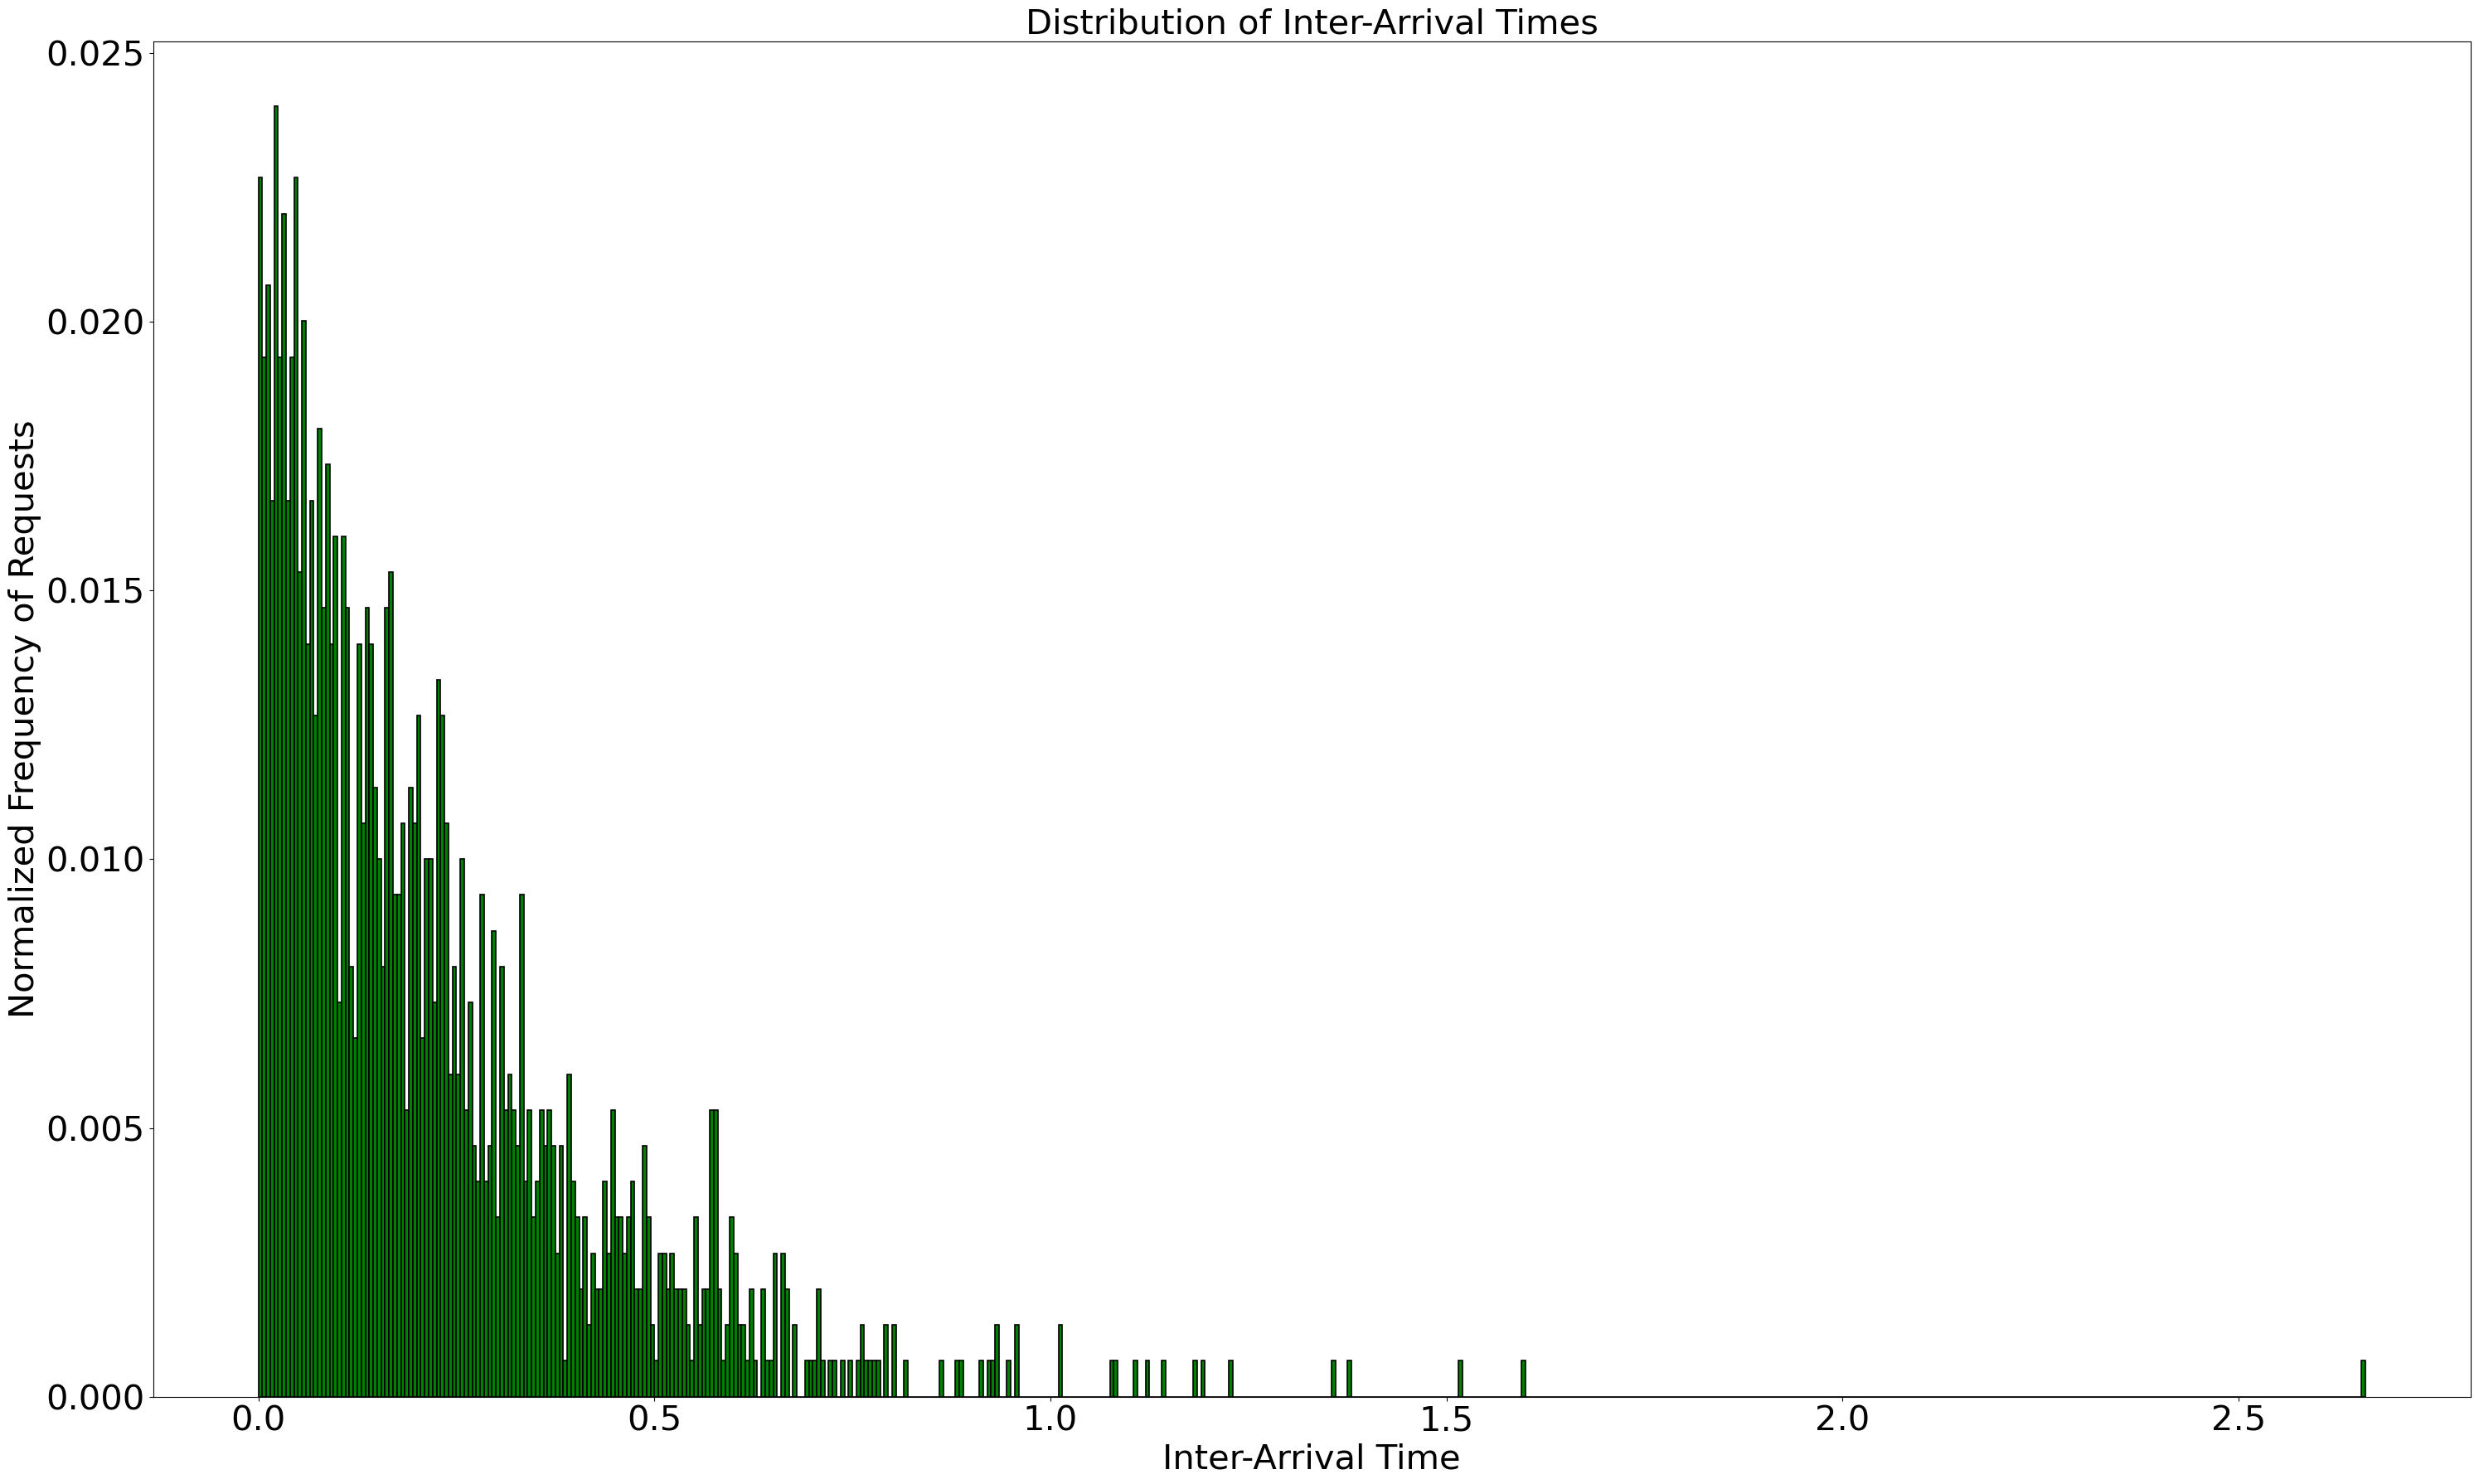

In [141]:
tailored_df_1a['inter_arrival'] = tailored_df_1a['sent_time'].diff().dropna()
bin_edges = np.arange(0, tailored_df_1a['inter_arrival'].max() + 0.005, 0.005)
hist, _ = np.histogram(tailored_df_1a['inter_arrival'], bins=bin_edges)
normalized_hist = hist / (len(tailored_df_1a) - 1)  # 999 inter-arrival 
plt.figure(figsize=(30, 18))
plt.bar(bin_edges[:-1], normalized_hist, width=0.005, align='edge', color='g', edgecolor='black', linewidth=1.2)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('Inter-Arrival Time', fontsize=30)
plt.ylabel('Normalized Frequency of Requests', fontsize=30)
plt.title('Distribution of Inter-Arrival Times', fontsize=30)
plt.tight_layout()
plt.savefig('1_1: Distribution of Inter-Arrival Times.png')
plt.show()

In [173]:
print(f"Mean = {np.mean(tailored_df_1a['inter_arrival'])}\nStandard deviation = {np.std(tailored_df_1a['inter_arrival'])}") 

Mean = 0.21897906804536368
Standard deviation = 0.2182914272255854


In [142]:
 ########### 1(b) IAT vs req_len with d = 1  ###########

In [143]:
df_1b = pd.read_fwf('q2.txt', header=None)
df_1b.rename(columns={df_1b.columns[0]: 'req_opt'}, inplace=True)

In [144]:
df_1b_noqueues = df_1b[df_1b.apply(remove_rows, axis=1)] 
df_1b_noqueues.reset_index(drop=True, inplace=True)

In [145]:
for i in range(len(df_1b_noqueues['req_opt'])):
    df_1b_noqueues['req_opt'][i] = re.sub(r"^(.*):", '', df_1b_noqueues['req_opt'][i])
    df_1b_noqueues['req_opt'][i] = re.split(r",", df_1b_noqueues['req_opt'][i])
    df_1b_noqueues['req_opt'][i][:] = map(lambda x: float(x), df_1b_noqueues['req_opt'][i])

/var/folders/vr/syshz9v92js62ld8ch0rw37r0000gn/T/ipykernel_3770/377274909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1b_noqueues['req_opt'][i] = re.sub(r"^(.*):", '', df_1b_noqueues['req_opt'][i])
/var/folders/vr/syshz9v92js62ld8ch0rw37r0000gn/T/ipykernel_3770/377274909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1b_noqueues['req_opt'][i] = re.split(r",", df_1b_noqueues['req_opt'][i])


In [146]:
tailored_df_1b = pd.DataFrame(columns=['sent_time', 'req_len', 'receipt_time', 'start_time', 'completion_time'])
for i in range(0, len(df_1b_noqueues)):
    row = df_1b_noqueues.iloc[i]
    new_row = {'sent_time': row[0][0],\
               'req_len': row[0][1],\
               'receipt_time': row[0][2],\
               'start_time': row[0][3],\
               'completion_time': row[0][4]
              }
    tailored_df_1b.loc[len(tailored_df_1b)] = new_row
    
print(tailored_df_1b)

        sent_time   req_len  receipt_time   start_time  completion_time
0     3758.466099  0.213916   3758.467986  3758.469343      3758.683303
1     3758.873837  0.206972   3758.873887  3758.873982      3759.080955
2     3759.229815  0.193727   3759.229845  3759.229875      3759.423603
3     3759.320608  0.157976   3759.320654  3759.423798      3759.581775
4     3759.500094  0.255103   3759.500131  3759.581856      3759.836964
...           ...       ...           ...          ...              ...
1495  4085.941256  0.200270   4085.941310  4086.028251      4086.228500
1496  4086.060075  0.116733   4086.060107  4086.228649      4086.345300
1497  4086.785391  0.243885   4086.785436  4086.785466      4087.029300
1498  4087.028935  0.208340   4087.028969  4087.029436      4087.237700
1499  4087.286846  0.175130   4087.286885  4087.286910      4087.462000

[1500 rows x 5 columns]


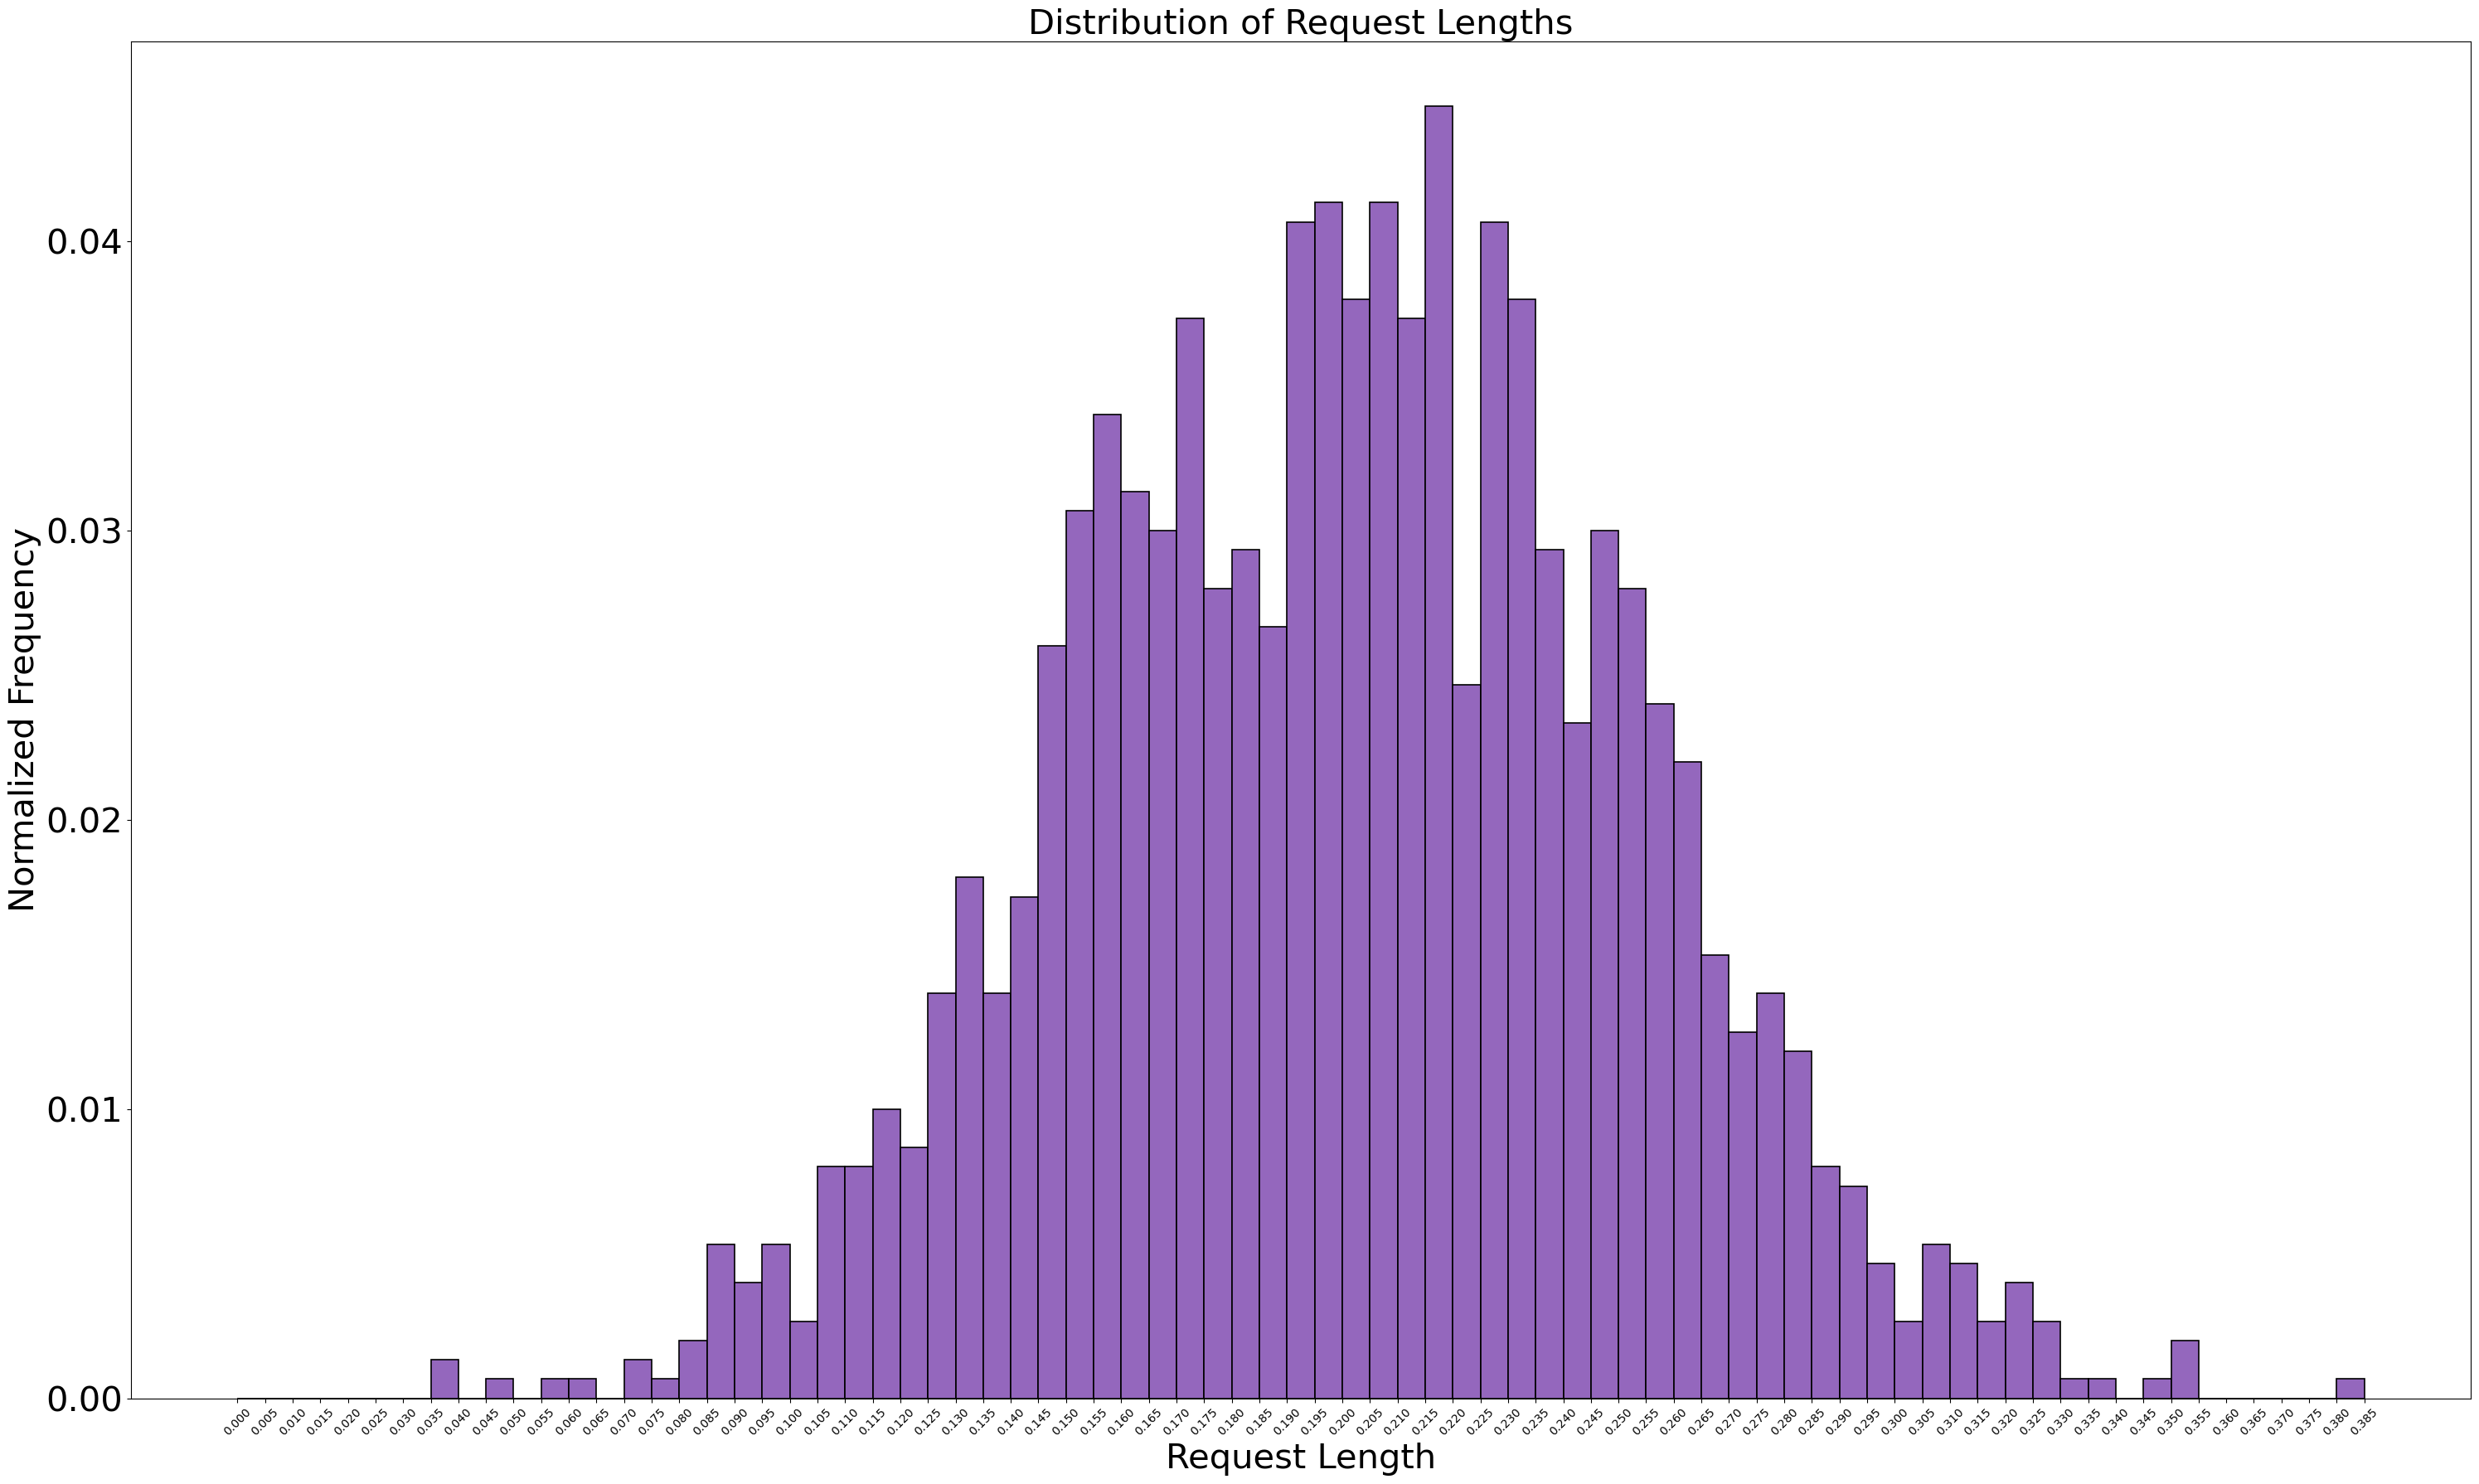

In [147]:
bins_partitioned = np.arange(0, max(tailored_df_1b['req_len'])+0.005, 0.005)
hist, _ = np.histogram(tailored_df_1b['req_len'], bins=bins_partitioned)
normalized_hist = hist / sum(hist)
plt.figure(figsize=(30, 18))
plt.bar(bins_partitioned[:-1], normalized_hist, width=0.005, align='edge', color='C4', edgecolor='black', linewidth=1.2)
plt.xticks(bins_partitioned, rotation=45)
plt.yticks(fontsize = 30)
plt.xlabel('Request Length', fontsize=30)
plt.ylabel('Normalized Frequency', fontsize=30)
plt.title('Distribution of Request Lengths', fontsize=30)
plt.tight_layout()
plt.savefig('1_2: Distribution of Request Lengths.png')
plt.show()

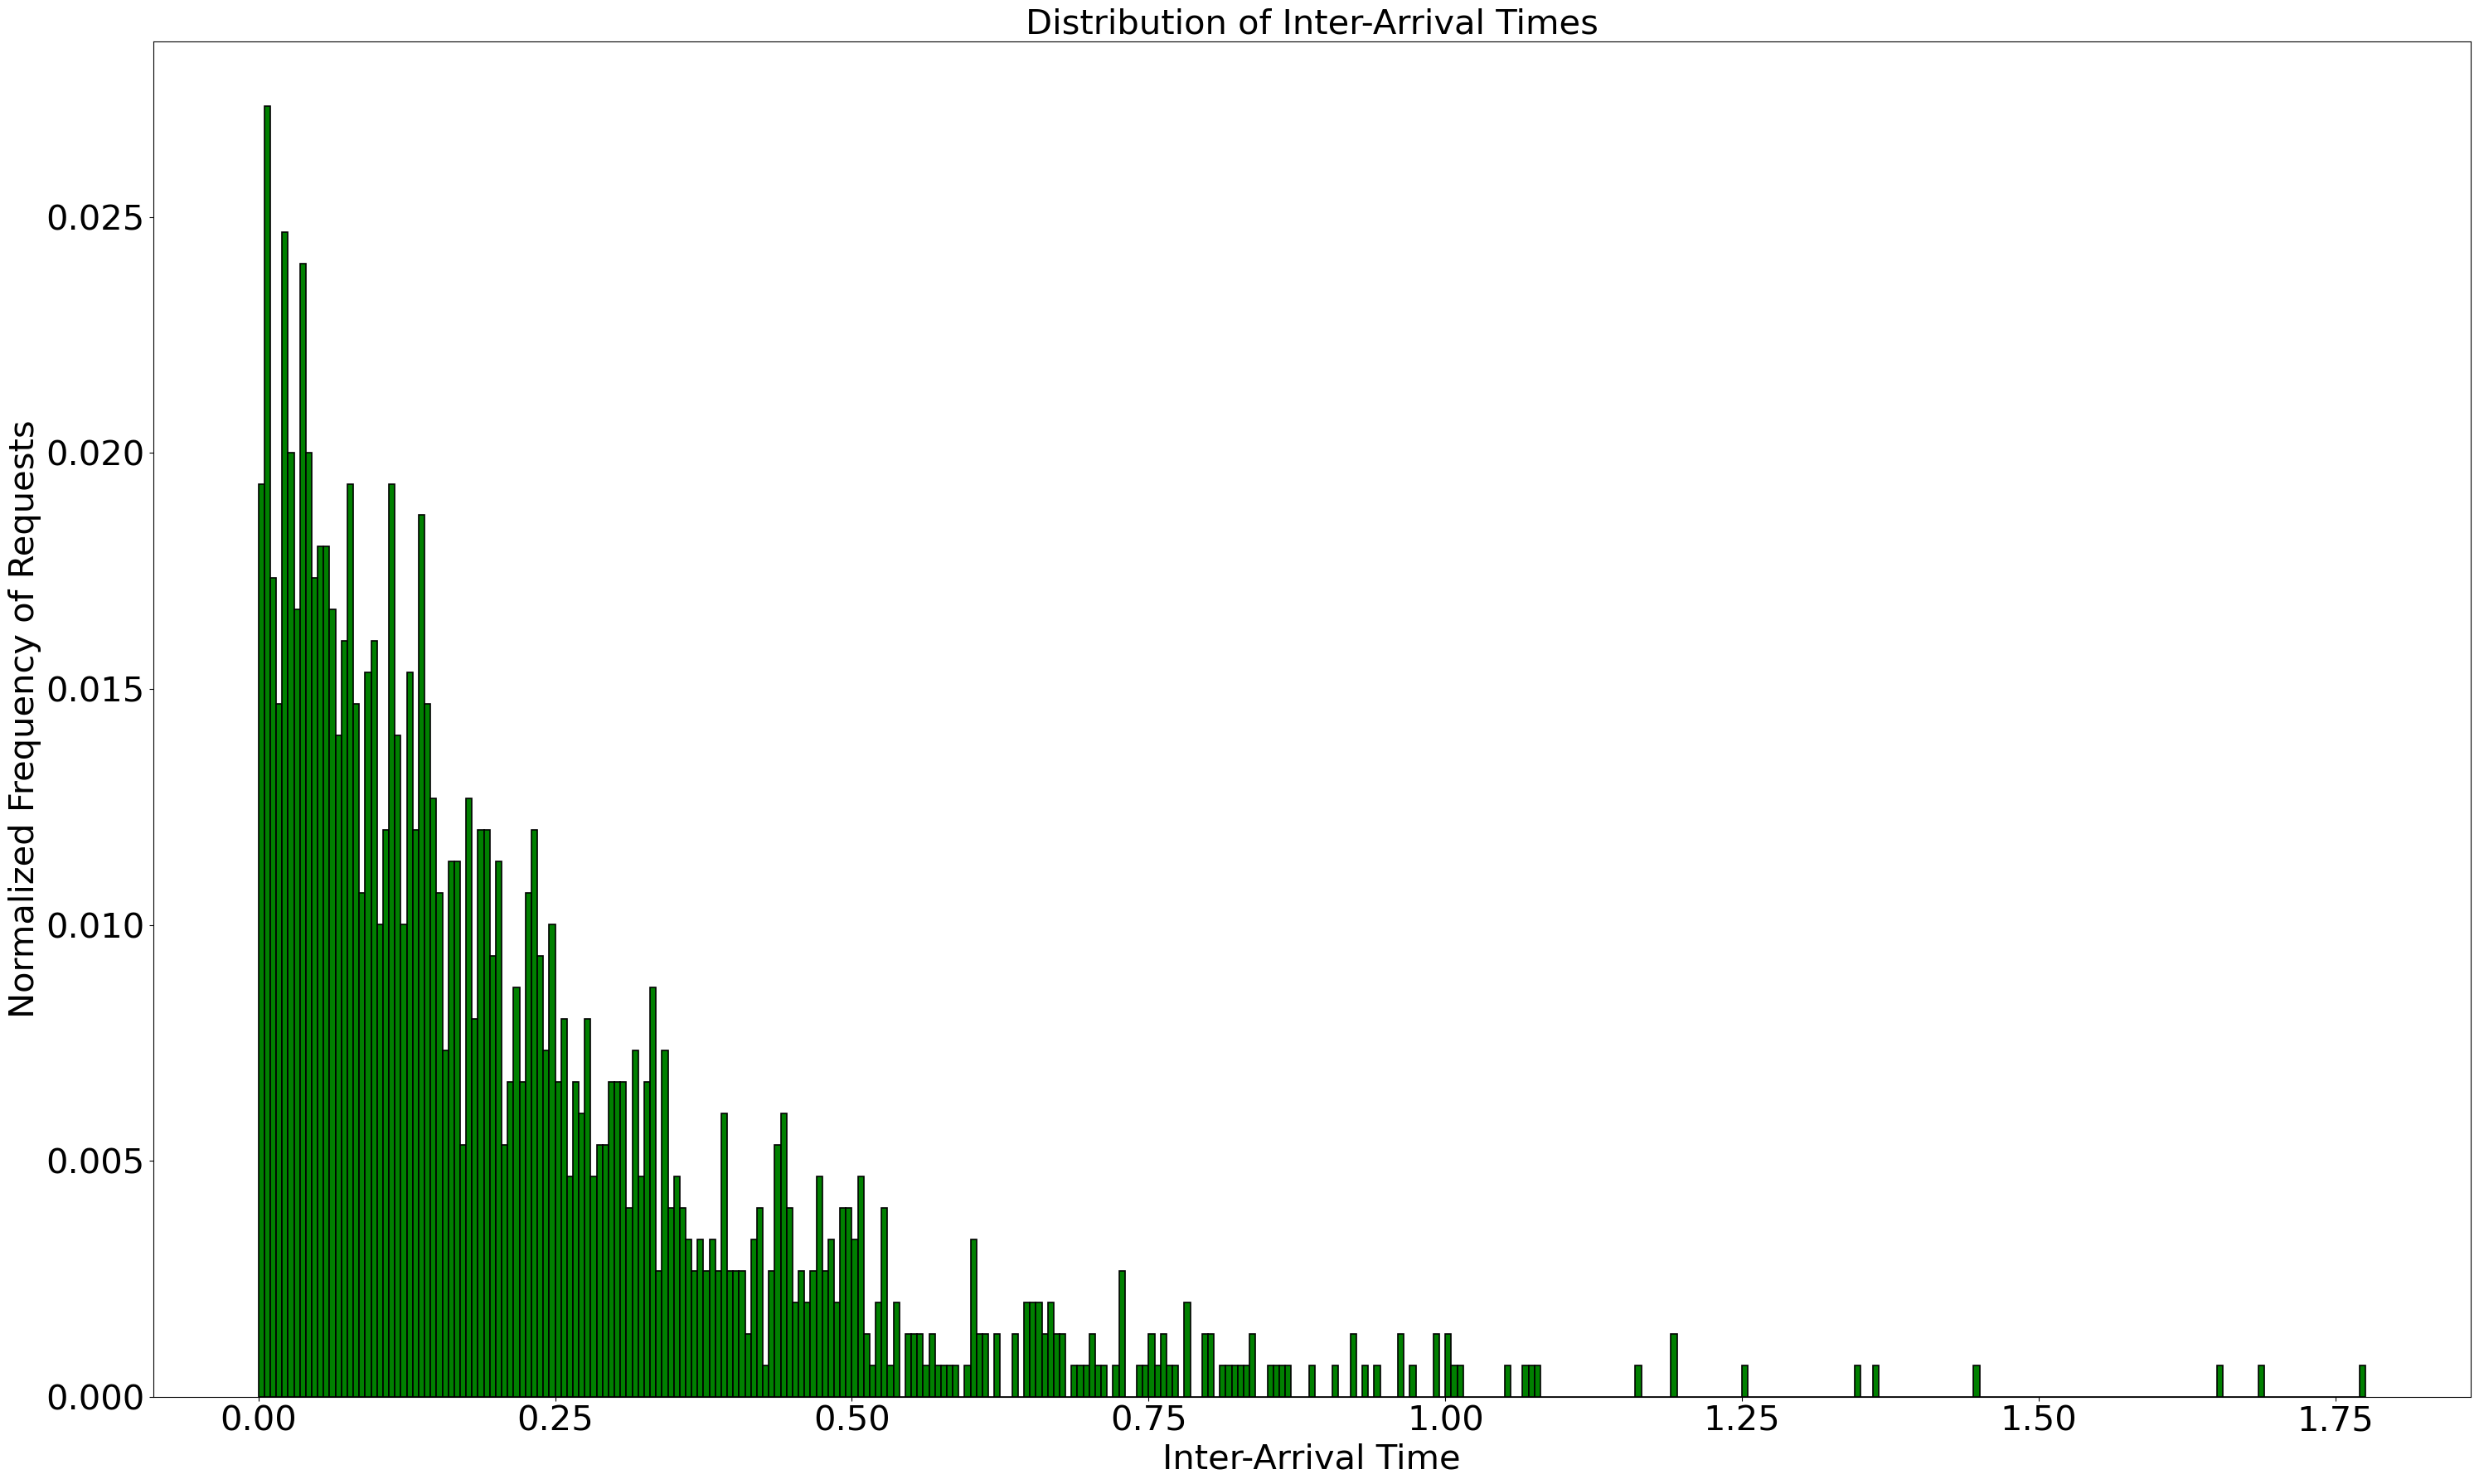

In [148]:
tailored_df_1b['inter_arrival'] = tailored_df_1b['sent_time'].diff().dropna()
bin_edges = np.arange(0, tailored_df_1b['inter_arrival'].max() + 0.005, 0.005)
hist, _ = np.histogram(tailored_df_1b['inter_arrival'], bins=bin_edges)
normalized_hist = hist / (len(tailored_df_1b) - 1) 
plt.figure(figsize=(30, 18))
plt.bar(bin_edges[:-1], normalized_hist, width=0.005, align='edge', color='g', edgecolor='black', linewidth=1.2)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('Inter-Arrival Time', fontsize=30)
plt.ylabel('Normalized Frequency of Requests', fontsize=30)
plt.title('Distribution of Inter-Arrival Times', fontsize=30)
plt.tight_layout()
plt.savefig('1_2: Distribution of Inter-Arrival Times.png')
plt.show()

In [149]:
len_mean = np.mean(tailored_df_1b['req_len'])
len_std = np.std(tailored_df_1b['req_len'])
iat_mean = np.mean(tailored_df_1b['inter_arrival'])
iat_std = np.std(tailored_df_1b['inter_arrival'])
iat_std

0.22219159048170303

####  distribution type for both inter-arrival times, mean, and std
Inter-arrival times are exponentially distributed with mean = 0.21936007138092045 and standard deviation = 0.22219159048170303.
#### distribution type for service lenghts, mean, and std
Service lengths are normally distributed with mean = 0.20219557866666665 and standard deviation = 0.05041654608061205.

In [150]:
 ########### 1(c): average response time by the server utilization ###########

In [151]:
files_0 = ['q3_a10.txt', 'q3_a11.txt',\
         'q3_a12.txt','q3_a13.txt',\
         'q3_a14.txt','q3_a15.txt',\
         'q3_a16.txt','q3_a17.txt',\
         'q3_a18.txt','q3_a19.txt']
files_1 = ['q3_a10_1.txt', 'q3_a11_1.txt',\
         'q3_a12_1.txt','q3_a13_1.txt',\
         'q3_a14_1.txt','q3_a15_1.txt',\
         'q3_a16_1.txt','q3_a17_1.txt',\
         'q3_a18_1.txt','q3_a19_1.txt']

ar_rates = list(range(10, 20))

In [152]:
dfs_0 = [pd.read_fwf(f, header=None) for f in files_0]
dfs_1 = [pd.read_fwf(f, header=None) for f in files_1]
for df in dfs_0:
    df.rename(columns={df.columns[0]: 'req_opt'}, inplace=True)
    # df.reset_index(drop=True, inplace=True)
    
for df in dfs_1:
    df.rename(columns={df.columns[0]: 'req_opt'}, inplace=True)

dfs_0[1]['req_opt'][2]
dfs_1[1]['req_opt'][2]

'R1:8582.210510,0.050000,8582.210560,8582.210672,8582.260675'

In [153]:
for df in dfs_0:
    df = df[df.apply(remove_rows, axis=1)] 
    df.reset_index(drop=True, inplace=True)
    
for df in dfs_1:
    df = df[df.apply(remove_rows, axis=1)] 
    df.reset_index(drop=True, inplace=True)

In [154]:
dfs_1[0]['req_opt'][9]

'Q:[]'

In [155]:
dfs_0 = [df[~(df.index % 2 == 1)] for df in dfs_0]
dfs_1 = [df[~(df.index % 2 == 1)] for df in dfs_1]

In [156]:
for df in dfs_0:
    df.reset_index(drop=True, inplace=True)
for df in dfs_1:
    df.reset_index(drop=True, inplace=True)

In [157]:
for df in dfs_0:
    for i in range(len(df['req_opt'])):
        df['req_opt'][i] = re.sub(r"^(.*):", '', df['req_opt'][i])
        df['req_opt'][i] = re.split(r",", df['req_opt'][i])
        df['req_opt'][i][:] = map(lambda x: float(x), df['req_opt'][i]) 
        
for df in dfs_1:
    for i in range(len(df['req_opt'])):
        df['req_opt'][i] = re.sub(r"^(.*):", '', df['req_opt'][i])
        df['req_opt'][i] = re.split(r",", df['req_opt'][i])
        df['req_opt'][i][:] = map(lambda x: float(x), df['req_opt'][i]) 

In [158]:
tailored_dfs_0 = []
tailored_dfs_1 = []
for df in dfs_0:
    tailored = pd.DataFrame(columns=['sent_time', 'req_len', 'receipt_time', 'start_time', 'completion_time'])
    for i in range(0, len(df)):
        row = df.iloc[i]
        new_row = {'sent_time': row[0][0],\
               'req_len': row[0][1],\
               'receipt_time': row[0][2],\
               'start_time': row[0][3],\
               'completion_time': row[0][4]
              }
        tailored.loc[len(tailored)] = new_row
    tailored_dfs_0 += [tailored]
    
for df in dfs_1:
    tailored = pd.DataFrame(columns=['sent_time', 'req_len', 'receipt_time', 'start_time', 'completion_time'])
    for i in range(0, len(df)):
        row = df.iloc[i]
        new_row = {'sent_time': row[0][0],\
               'req_len': row[0][1],\
               'receipt_time': row[0][2],\
               'start_time': row[0][3],\
               'completion_time': row[0][4]
              }
        tailored.loc[len(tailored)] = new_row
    tailored_dfs_1 += [tailored]


In [159]:
utilizations_0 = [sum(df['req_len']) / (df['completion_time'][1499] - df['start_time'][0]) for df in tailored_dfs_0]
utilizations_1 = [sum(df['req_len']) / (df['completion_time'][1499] - df['start_time'][0]) for df in tailored_dfs_1]

In [160]:
for df in tailored_dfs_0:
    df['response_time'] = df['completion_time'] - df['sent_time']

for df in tailored_dfs_1:
    df['response_time'] = df['completion_time'] - df['sent_time']

avg_resp_time_0 = [np.mean(df['response_time']) for df in tailored_dfs_0]
avg_resp_time_1 = [np.mean(df['response_time']) for df in tailored_dfs_1]

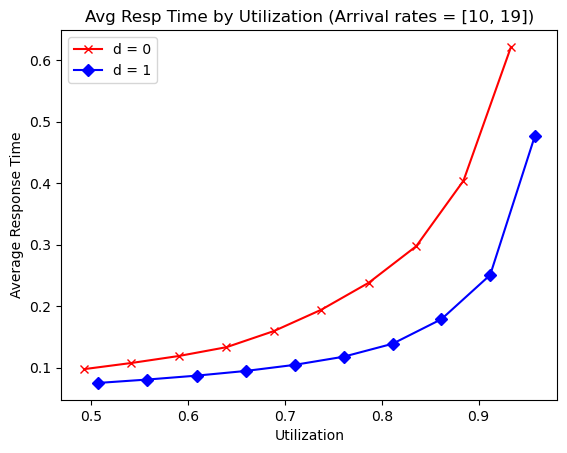

In [175]:
fig, ax1 = plt.subplots()
ax1.plot(utilizations_0, avg_resp_time_0, 'r-', marker='x', label='d = 0')
ax1.plot(utilizations_1, avg_resp_time_1, 'b-', marker='D', label='d = 1')
ax1.set_xlabel('Utilization')
ax1.set_ylabel('Average Response Time')
ax1.tick_params('y')
ax1.set_title('Avg Resp Time by Utilization (Arrival rates = [10, 19])')
ax1.legend()

In [162]:
 ########### 1(d) ###########

In [163]:
# the ratio of requests that get rejected over the total
df_1d = pd.read_fwf('q4.txt', header=None)
df_1d.rename(columns={df_1d.columns[0]: 'req_opt'}, inplace=True)
num_X = df_1d['req_opt'].str.count('X').sum()
rej_rate = num_X / 1500
rej_rate

0.034

In [164]:
# plot the distribution of the inter-rejection time, 
# i.e. the time that elapses between a rejection and the next.
df_rejs = df_1d[df_1d['req_opt'].str.startswith('X')]
df_rejs.reset_index(drop=True, inplace=True)
for i in range(len(df_rejs['req_opt'])):
    df_rejs['req_opt'][i] = re.sub(r"^(.*):", '', df_rejs['req_opt'][i])
    df_rejs['req_opt'][i] = re.split(r",", df_rejs['req_opt'][i])
    df_rejs['req_opt'][i][:] = map(lambda x: float(x), df_rejs['req_opt'][i])

/var/folders/vr/syshz9v92js62ld8ch0rw37r0000gn/T/ipykernel_3770/1565990772.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rejs['req_opt'][i] = re.sub(r"^(.*):", '', df_rejs['req_opt'][i])
/var/folders/vr/syshz9v92js62ld8ch0rw37r0000gn/T/ipykernel_3770/1565990772.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rejs['req_opt'][i] = re.split(r",", df_rejs['req_opt'][i])


In [165]:
tailored_rejs = pd.DataFrame(columns=['sent_time', 'req_len', 'reject_time'])
for i in range(0, len(df_rejs)):
    row = df_rejs.iloc[i]
    new_row = {'sent_time': row[0][0],\
               'req_len': row[0][1],\
               'reject_time': row[0][2]
              }
    tailored_rejs.loc[len(tailored_rejs)] = new_row
    
print(tailored_rejs)

       sent_time   req_len   reject_time
0   10332.761378  0.002004  10332.761408
1   10332.803530  0.134291  10332.803586
2   10334.149353  0.118652  10334.149389
3   10334.166192  0.071455  10334.166229
4   10334.204241  0.136671  10334.204289
5   10335.027675  0.008587  10335.027710
6   10335.030659  0.011428  10335.030686
7   10345.008574  0.018788  10345.008599
8   10359.912724  0.038001  10359.912750
9   10359.946527  0.175398  10359.946557
10  10360.458331  0.090252  10360.466038
11  10362.202935  0.088194  10362.225038
12  10362.212309  0.005991  10362.225066
13  10362.226328  0.098587  10362.226385
14  10362.259825  0.030925  10362.259866
15  10362.708761  0.052500  10362.710043
16  10362.709774  0.059158  10362.710065
17  10362.763456  0.112858  10362.763480
18  10362.819621  0.031218  10362.819650
19  10362.999269  0.010045  10363.019037
20  10363.071229  0.027035  10363.096046
21  10363.079490  0.024330  10363.096062
22  10363.092749  0.006944  10363.096072
23  10363.176325

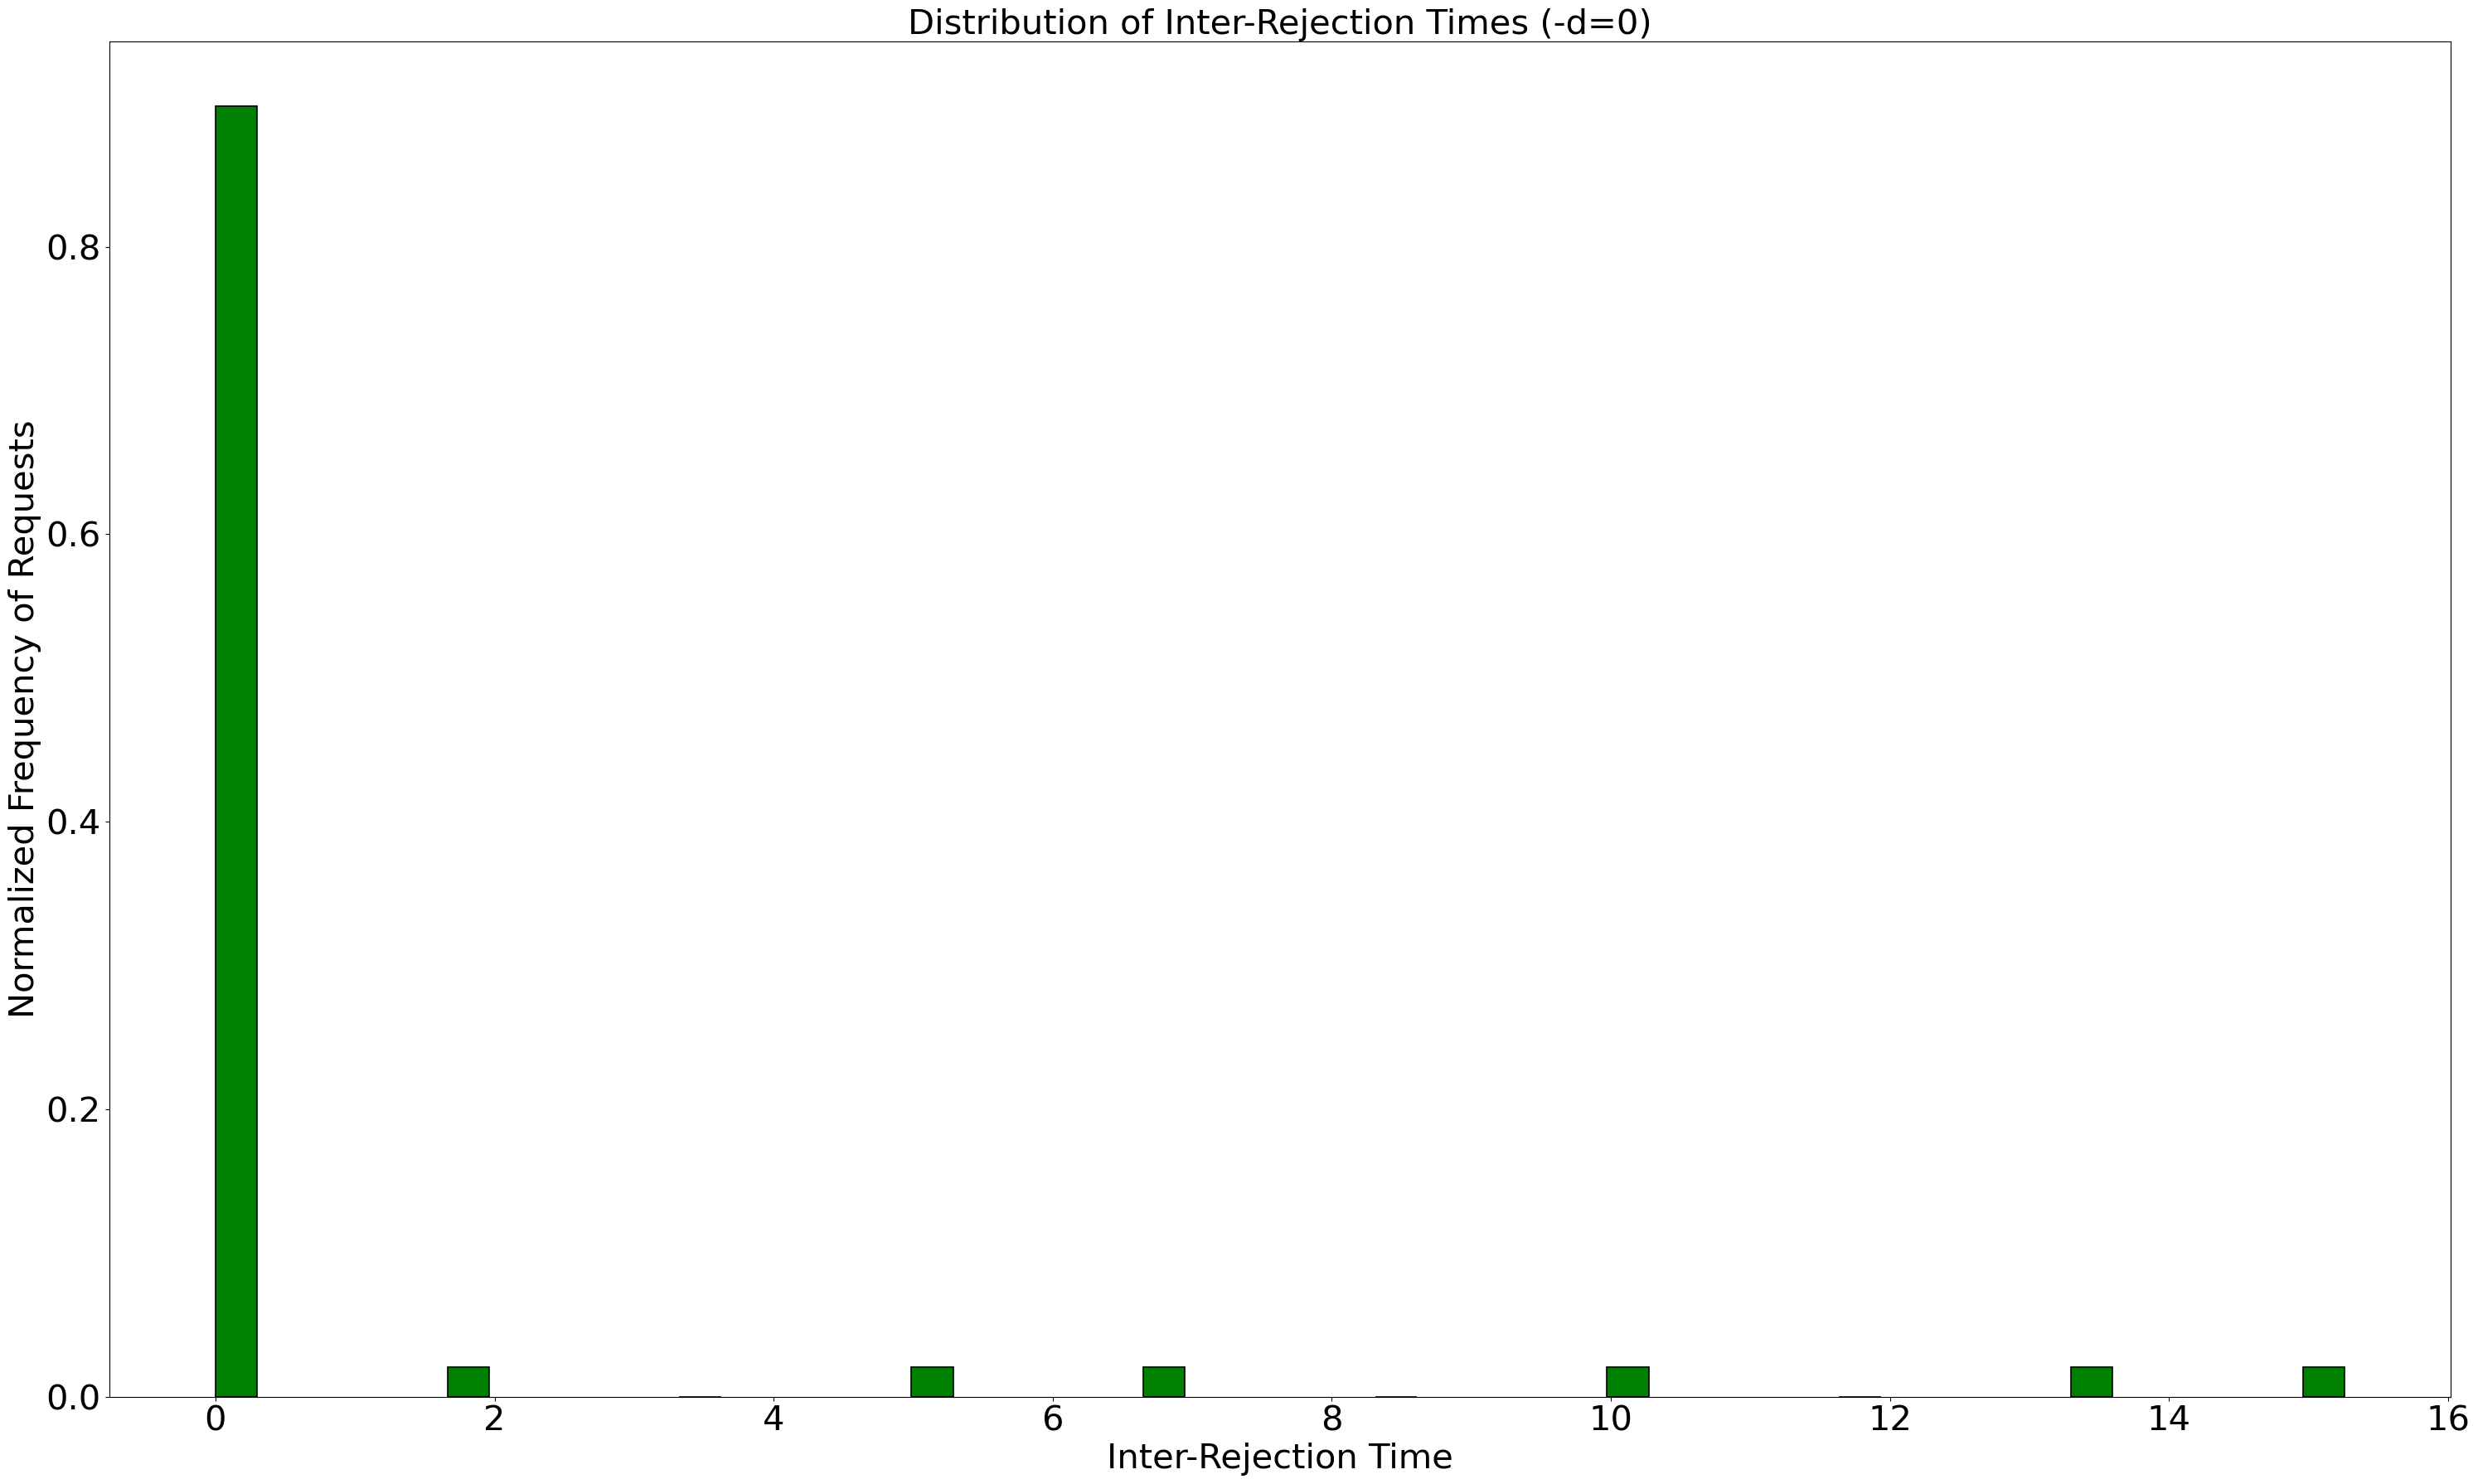

In [166]:
tailored_rejs['inter_rej'] = tailored_rejs['reject_time'].diff()

# Remove NaN values
tailored_rejs.dropna(subset=['inter_rej'], inplace=True)

plt.figure(figsize=(30, 18))

# Calculate the histogram without density normalization
hist, bin_edges = np.histogram(tailored_rejs['inter_rej'])
normalized_hist = hist / (len(tailored_rejs) - 1)  # Normalize by the number of data points

# Create the bar plot with normalized histogram
plt.bar(bin_edges[:-1], normalized_hist, width=0.3, align='edge', color='g', edgecolor='black', linewidth=1.2)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Inter-Rejection Time', fontsize=30)
plt.ylabel('Normalized Frequency of Requests', fontsize=30)
plt.title('Distribution of Inter-Rejection Times (-d=0)', fontsize=30)

# Set y-axis limits to [0.0, 1.0]
#plt.ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('1_4: Distribution of Inter-Rejection Times (-d=0).png')
plt.show()


#### share your insights on the shape of the distribution
The shape suggests that inter-rejection times are exponentially distributed.

In [167]:
 ########### 1(e) ###########

In [168]:
# the ratio of requests that get rejected over the total
df_1e = pd.read_fwf('q5.txt', header=None)
df_1e.rename(columns={df_1e.columns[0]: 'req_opt'}, inplace=True)
num_X = df_1e['req_opt'].str.count('X').sum()
rej_rate = num_X / 1500
rej_rate

0.01

In [169]:
# plot the distribution of the inter-rejection time, 
# i.e. the time that elapses between a rejection and the next.
df_rejs = df_1e[df_1e['req_opt'].str.startswith('X')]
df_rejs.reset_index(drop=True, inplace=True)
for i in range(len(df_rejs['req_opt'])):
    df_rejs['req_opt'][i] = re.sub(r"^(.*):", '', df_rejs['req_opt'][i])
    df_rejs['req_opt'][i] = re.split(r",", df_rejs['req_opt'][i])
    df_rejs['req_opt'][i][:] = map(lambda x: float(x), df_rejs['req_opt'][i])

/var/folders/vr/syshz9v92js62ld8ch0rw37r0000gn/T/ipykernel_3770/1419938971.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rejs['req_opt'][i] = re.sub(r"^(.*):", '', df_rejs['req_opt'][i])
/var/folders/vr/syshz9v92js62ld8ch0rw37r0000gn/T/ipykernel_3770/1419938971.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rejs['req_opt'][i] = re.split(r",", df_rejs['req_opt'][i])


In [170]:
tailored_rejs = pd.DataFrame(columns=['sent_time', 'req_len', 'reject_time'])
for i in range(0, len(df_rejs)):
    row = df_rejs.iloc[i]
    new_row = {'sent_time': row[0][0],\
               'req_len': row[0][1],\
               'reject_time': row[0][2]
              }
    tailored_rejs.loc[len(tailored_rejs)] = new_row
    
print(tailored_rejs)

       sent_time  req_len   reject_time
0   10540.480702     0.05  10540.485088
1   10540.559437     0.05  10540.585210
2   10540.658655     0.05  10540.658682
3   10540.678920     0.05  10540.678951
4   10542.167435     0.05  10542.186560
5   10542.184287     0.05  10542.186595
6   10542.386095     0.05  10542.386128
7   10562.385090     0.05  10562.399815
8   10580.011545     0.05  10580.031065
9   10589.771871     0.05  10589.771901
10  10589.846207     0.05  10589.847056
11  10590.038611     0.05  10590.038639
12  10590.046592     0.05  10590.046621
13  10595.809015     0.05  10595.823058


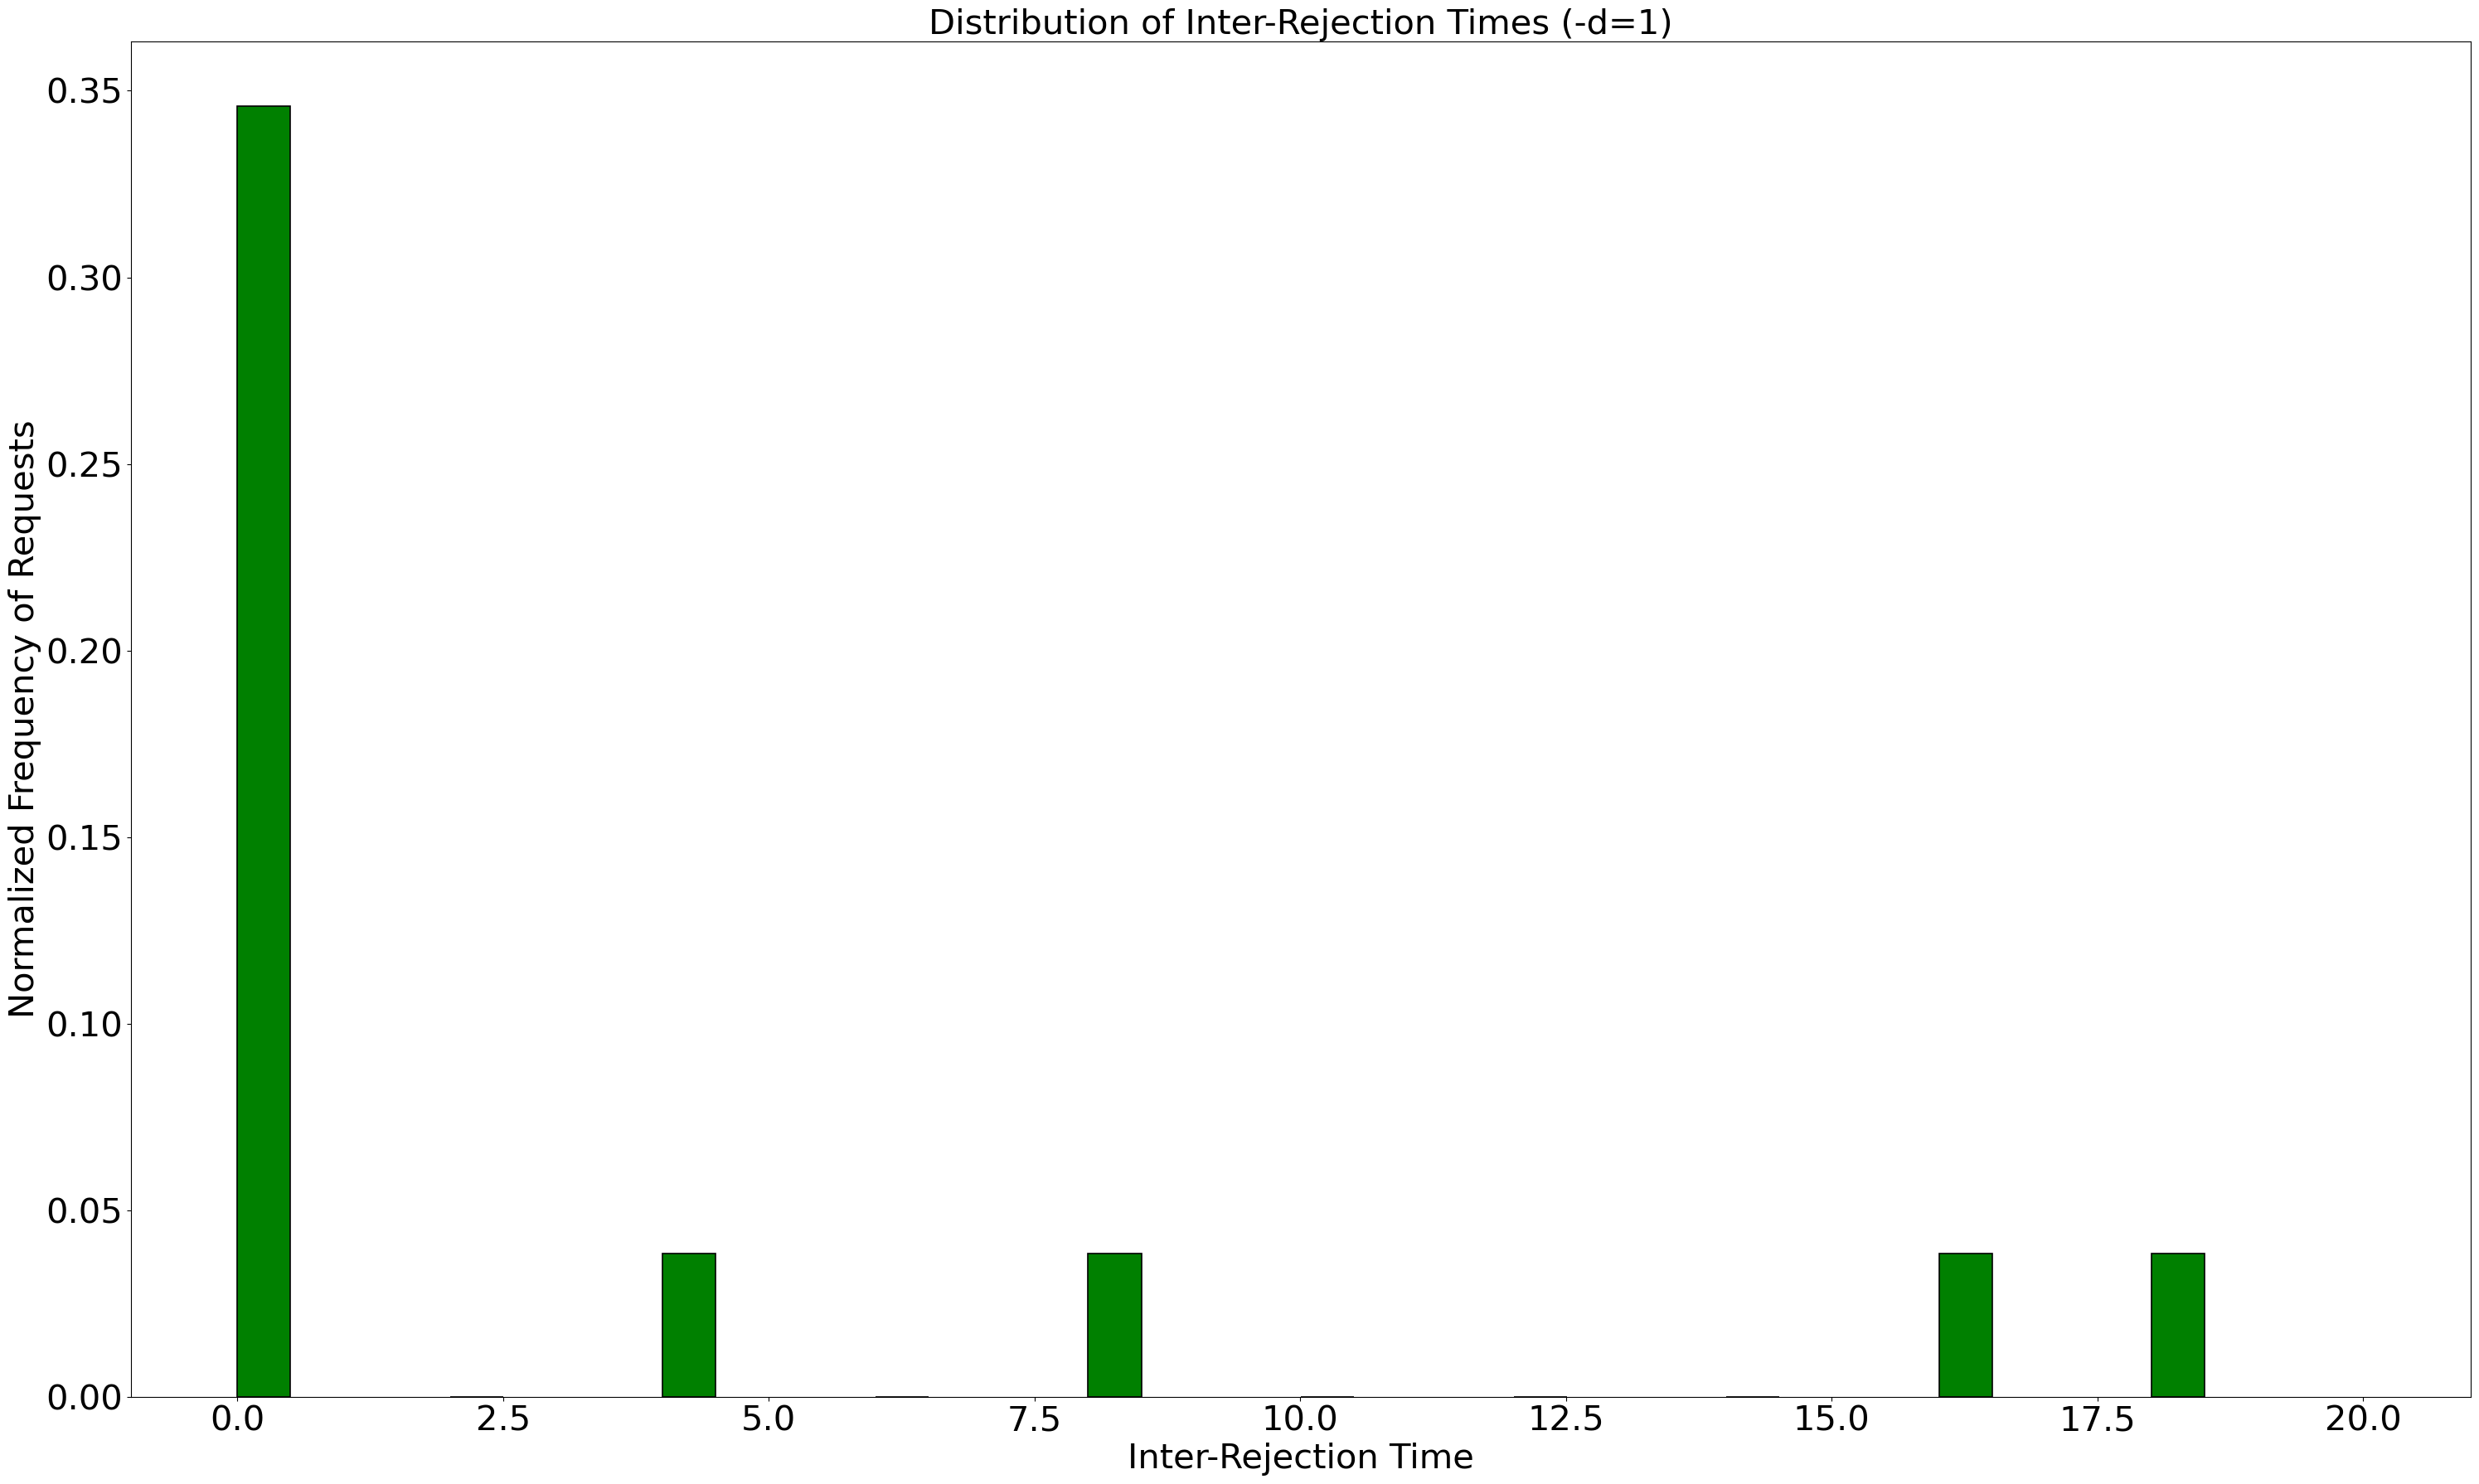

In [171]:
tailored_rejs['inter_rej'] = tailored_rejs['reject_time'].diff().dropna()
plt.figure(figsize=(30, 18))
plt.hist(tailored_rejs['inter_rej'], width=0.5, density=True, color='g', edgecolor='black', linewidth=1.2)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Inter-Rejection Time', fontsize=30)
plt.ylabel('Normalized Frequency of Requests', fontsize=30)
plt.title('Distribution of Inter-Rejection Times (-d=1)', fontsize=30)
plt.tight_layout()
plt.savefig('1_5: Distribution of Inter-Rejection Times (-d=1).png')
plt.show()



#### share your insights on the shape of the distribution (does the new system (the one that uses -d 1) offers a better or worse service to its users?)
The shape suggests that when -d is set to 1, the inter-rejection times also follows exponential distribution. The new system has a generally longer (i.e. more spread out distribution) inter-rejection times. In general, a system with longer inter-request rejection times is better for users compared to a system with shorter inter-rejection times (-d = 0). Longer inter-request rejection times mean that requests are more likely to be accepted and processed by the system. Users send requests to a system with the expectation that their requests will be fulfilled. Moreover, a system with longer inter-request rejection times can handle a higher volume of requests without overwhelming the system.